<div style="width: 80%;">

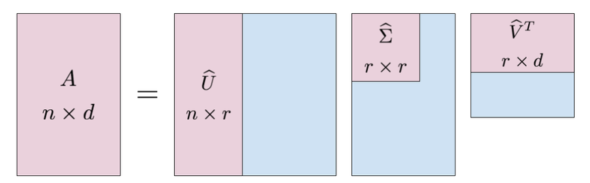
<div style="clear: both"></div>
<br>

<div style="font-size: 20pt; float: left;">Anwendungen der linearen Algebra</div>
<div style="font-size: 20pt; text-align: right;">FS 2023</div>
<div style="font-size: 15pt; margin-top: 10px;">Fachexperten: Roger Burkhardt, Cédric Huwyler</div>
</div>
<br>


# Mini-Challenge 1 zum Thema *Page Rank*

In der Kompetenz *Mathematische Grundlagen* haben Sie Graphen als mathematische Struktur kennengelernt, insbesondere, dass diese mit Hilfe der linearen Algebra, mit einer sogenannten *Adjazenzmatrix* repräsentiert werden können. Wie Sie sich sicher vorstellen können, können mit Hilfe dieser Matrix auch interessante Erkenntnisse über den Graphen gewonnen werden, indem wir darauf die in diesem Semester aufgebauten Erkenntnisse anwenden. In dieser ersten Minichallenge setzen wir uns dazu mit einem wichtigen Problem der Graphentheorie und noch wichtigerem Problem in der *Sozialen Netzwerkanalyse* (siehe separate Kompetenz) auseinander:

<div class="alert alert-block alert-success">Gegeben sei ein Graph mit Knoten und Kanten. Welche Knoten im Graph sind wichtig, welche Knoten weniger wichtig?</div>

Die Beantwortung dieser Frage ist natürlich in ihrer Natur absolut subjektiv, was wichtig ist, ist eine sehr individuelle Entscheidung. So kann man zum Beispiel definieren, dass ein Knoten wichtig ist, wenn er viele Verbindungen zu anderen Knoten hat. Ist jemand, der auf Facebook möglichst viele Leute um ihre Freundschaft angefragt hat wirklich eine wichtige Person? Laut anderen Definitionen ist ein Knoten wichtig, wenn möglichst viele kürzeste Verbindungen zwischen anderen Knoten über ihn gehen oder wenn er zu möglichst vielen anderen Knoten ihr nächster Nachbar ist, und so weiter. Wie kann man also die Subjektivität dieser Definition übergehen? Ein einfacher Lösungsansatz ist hier *Rekursion*:

*Wichtig ist ein Knoten dann, wenn er mit wichtigen Knoten verbunden ist.*

Dieser Ansatz stellt ausschliesslich die Kanten zwischen den Knoten in den Vordergrund, also den Vernetzungsaspekt eines Knotes. Andere Knoteneigenschaften spielen keine Rolle.

Leute, die sehr viele wichtige andere Leute in ihrem Netzwerk haben, sind also wichtig. Was ist jetzt aber wichtig? Wir haben es rekursiv definiert und müssen dazu zuerst eine entsprechende rekursive Gleichung aufstellen und diese lösen. Genau das werden Sie in dieser Mini-Challenge tun.

In dieser Mini-Challenge werden Sie lernen, Graphenprobleme mit Matrizen und den Tools der linearen Algebra anzugehen und damit ihre Werkzeugkiste auf ein komplexes System anzuwenden. Dabei soll die Graphentheorie nicht in aller Tiefe erkundet werden (das werden sie in *Soziale Netzwerkanalyse* lernen), sondern vor allem die damit verbundene lineare Algebra.

**Musterlösung:**

Zu dieser Minichallenge existiert (bewusst) keine Musterlösung. Sie können Sie aber gerne zur Durchsicht und Kommentierung uns entweder in einer der Sprechstunden vorstellen oder mit Ihren Mitstudierenden auf Spaces diskutieren.

Wir laden zuerst die für diese Übung benötigten Module. **Hinweis:** Wir benutzen das Modul `networkx` für die graphische Darstellung von Graphen.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import networkx as nx

## Aufgabe 1: Repräsentation von Graphen mit Matrizen

### Ein kleines Beispiel

Graphen haben Sie bereits in *Mathematische Grundlagen* kennengelernt, hier trotzdem noch einmal eine kurze Zusammenfassung der Begrifflichkeiten:

Graphen bestehen aus **Knoten** (numerierte Kreise, Englisch: *node*) und **Kanten** (Pfeile / Verbindungen, Englisch: *edge*) und sind entweder **gerichtet** oder **ungerichtet**. Bei gerichteten Graphen kann der Kante nur in einer Richtung gefolgt werden, darum werden solche Kanten üblicherweise mit Pfeilen dargestellt. Sind die Kanten verschieden wichtig, so nennt man einen solchen Graphen **gewichtet** und visualisiert dies mit Pfeilen verschiedener Dicke. Hier ist ein Beispiel eines sehr einfachen, gerichteten, ungewichteten Graphen:

<div><img src="mc1_bild1.png" width="500"></div>

Es gibt zwei äquivalente mathematische Darstellungsarten mit Matrizen für den obigen Graphen:

1. Die **Adjazenzmatrix** ist eine Matrix $A \in \mathbb{R}^{n\times n}$ für einen Graphen mit $n$ Knoten, deren Elemente eins sind wo zwei Knoten verbunden sind und sonst null. Für das obige Beispiel ist

$$
A = \begin{pmatrix}  0 & 0 & 1 & 1 \\ 1 & 0 & 1 & 1 \\ 0 & 0 & 0 & 0 \\ 1 & 0 & 0 & 0 \end{pmatrix}
$$

In der ersten Zeile stehen zum Beispiel alle Verbindungen mit Ausgangsknoten 1 zum Endknoten $i$: Der Knoten 1 hat also Verbindungen zu den Knoten 3 und 4 und keine Verbindungen zum Knoten 2 (und keine Verbindung zu sich selbst; Graphen in denen Knoten zu sich selbst verbinden betrachten wir hier nicht, die Diagonale von $A$ wird also immer Null sein).

2. Die **Inzidenzmatrix** ist eine Matrix $E \in \mathbb{R}^{m\times2}$ für einen Graphen mit $m$ Kanten. In der ersten Spalte von $E$ steht jeweils die Nummer des Ausgangsknotens einer Verbindung, in der zweiten Spalte die Nummer des Endknotens, und das für alle $m$ Kanten:

$$
E = \begin{pmatrix} 1 & 3 \\ 1 & 4 \\ 2 & 1 \\ 2 & 3 \\ 2 & 4 \\ 4 & 1 \end{pmatrix}
$$

$A$ und $E$ haben u.a. folgende Eigenschaften:

* Für ungerichtete Graphen gilt $A^T = A$ und damit ist $A$ symmetrisch, für *gerichtete* Graphen (wie in diesem Beispiel) gilt diese Aussage jedoch nicht.
* $E$ hat genauso viele Zeilen, wie $A$ Elemente ungleich Null hat, also $\sum_{i,j=1}^n A_{ij} = m$.
* $A$ ist quadratisch und hat genauso viele Zeilen und Spalten wie die Anzahl Knoten, die in $E$ vorkommen.
* $A$ besitzt im Allgemeinen keine Inverse.

### Graph für die Aufgabenstellung

Der folgende gerichtete Graph sei nun gegeben:

<div><img src="mc1_bild2.png" width="600"></div>

Definieren Sie zuerst seine Inzidenzmatrix als $13\times2$-Matrix. Beachten Sie: der letzte Graph begann mit der Knotennumerierung bei 1, dieser beginnt bei 0.

In [ ]:
# IHR CODE STARTET HIER

# Dieses Assert-Statement sollte von Ihrer Matrix E erfüllt werden
assert( E.shape==(13,2) )

Die Inzidenzmatrix braucht zum Abtippen wesentlich weniger Konzentration als die Adjazenzmatrix, meistens ist die Adjazenzmatrix für Berechnungen aber spannender. Aus diesem Grund hätten wir gerne eine Funktion `adj( E )`, die aus einer beliebigen Inzidenzmatrix die Adjazenzmatrix berechnet und sie zurückgibt. Schreiben Sie eine solche Funktion.

**Hinweise**: 
* Sie dürfen annehmen, dass die Knotennummerierung in der Inzidenzmatrix immer bei 0 beginnt und durchgehend ist.
* Es ist sehr hilfreich, zuerst die Anzahl Knoten und Kanten im Graphen zu bestimmen.

In [ ]:
# IHR CODE


Nun können Sie die zur obigen Inzidenzmatrix $E$ passende Adjazenzmatrix $A$ bestimmen. Passt sie zum obigen Graphen?

In [ ]:
A = adj( E )
print( A )

Ist $A$ invertierbar?

In [ ]:
# IHR CODE


Prüfen Sie als Unit-Test, ob die Anzahl Zeilen von $E$ mit der Summe der Elemente aus $A$ übereinstimmen:

In [ ]:
# IHR CODE


Zur Visualisierung Ihrer Graphen stellen wir Ihnen eine Funktion zur Verfügung. Damit können Sie verifizieren, ob Sie die Inzidenzmatrix korrekt eingegeben und richtig in die Adjazenzmatrix umgewandelt haben:

In [ ]:
def plot_graph( A, knoten_gewichte=None ):
    """
    Funktion zur graphischen Darstellung eines Graphen. 
    Benutzt das 'spring layout', eventuell muss die Funktion mehrere Male ausgeführt werden, bis eine schöne Darstellung 
    des Graphen vorliegt.
    
    Arguments: 
    A -- Adjazenzmatrix (shape (n_knoten,n_knoten))
    knoten_gewichte -- Liste mit Gewichte für jeden Knoten im Graphen (bei None erhalten alle Knoten die gleichen Gewichte)
    """
    
    if knoten_gewichte is None:
        knoten_gewichte = np.array( [1] * A.shape[0] )
    
    assert( len( knoten_gewichte) == A.shape[0] )
        
    knoten_gewichte = knoten_gewichte / np.mean( knoten_gewichte )
    
    plt.figure(figsize=(8,8))
    G = nx.DiGraph( A )
    pos = nx.layout.spring_layout(G)
    options = {
    'node_color': '#dd0000',
    'node_size': knoten_gewichte*2500,
    'width': 3,
    'arrowstyle': '-|>',
    'arrowsize': 12,
    }
        
    nx.draw_networkx(G, pos, arrows=True, **options )
    plt.axis("off")
    plt.show()

Natürlich werden die Knoten etwas anders angeordnet sein, als im obigen Bild. Möglicherweise müssen Sie die Funktion mehrmals ausführen, bis Sie einen schön dargestellten Plot bekommen:

In [ ]:
plot_graph( A )

## Aufgabe 2: Zentralitätsmasse auf gerichteten Graphen

Nun können wir beliebige Graphen mit Matrizen darstellen und können damit erste Berechnungen machen. Eine häufige Aufgabenstellung ist das Finden von wichtigen Knoten in einem Netzwerk. In dieser Aufgabe werden Sie zwei verschiedenartige Zentralitätsmasse kennenlernen.

### Teilaufgabe a) In- und Outdegree

Das einfachste Mass für Wichtigkeit ist die Anzahl Verbindungen, die ein Knoten nach aussen hat (*'Outdegree'*) und die Anzahl Verbindungen, die einen Knoten von aussen ansteuern (*'Indegree'*). Berechnen Sie im Folgenden über die Matrix $A$ den Indegree und den Outdegree aller Knoten. Geben Sie Ihr Resultat angemessen aus. Welche Knoten haben den grössten Out- respektive Indegree? (Tipp: Prüfen Sie ihre Resultate anhand der graphischen Darstellung nach)

In [ ]:
# IHR CODE


Knoten mit am meisten Eingangsverbindungen (Suchen Sie eine Funktion in Numpy, die nicht das Maximum, sondern den Ort des Maximums ausgibt):

In [ ]:
# IHR CODE


Knoten mit am meisten Ausgangsverbindungen:

In [ ]:
# IHR CODE


Mit der Ihnen zur Verfügung gestellten Funktion `plot_graph` können Sie die Knotengrössen nach Ausgangsgrad darstellen:

In [ ]:
plot_graph( A, knoten_gewichte=outdegrees )

### Teilaufgabe b) Eigenvector Centrality aus numerischer Sicht: als Fixpunktverfahren

Das Konzept *'wer am meisten Verbindungen hat, ist am wichtigsten'* ist sehr einfach. Stellen Sie sich vor, jeder Knoten ist eine Webseite, die über die Pfeile auf andere Webseiten verbindet. Wenn wir zum Beispiel gefundene Suchresultate nach Wichtigkeit sortieren und einer Benutzerin präsentieren wollen, ist es für eine 'böswillige' Webseite sehr einfach zu tricksen: Einfach möglichst viele neue Webseiten erstellen, die auf die eigene Webseite zeigen und schon kommt man ganz oben (sogenannte [Link Farms](https://en.wikipedia.org/wiki/Link_farm)).

Im Folgenden möchten wir das bereits in der Einführung angesprochene, etwas abstraktere und rekursiv definierte Zentralitätsmass einführen:

**Wir definieren die Wichtigkeit eines Knotens als die Summe der Wichtigkeit aller Knoten, die auf diesen Knoten verbinden.**

Sei ein Graph $G$ mit $n$ Knoten und $m$ Kanten gegeben. Dann bezeichne $x_i$ die Wichtigkeit eines Knotens und für diese gilt:

$$ x_i = \sum_{k\in N(i)} x_k, $$

wobei $N(i)$ die *Nachbarschaft* des Knotens $i$ bezeichnet: eine Liste aller Knoten, die zum Knoten $i$ eine Verbindung haben. $N(6)$ ist also zum Beispiel $\{0,5,7\}$. Diese Formel ist ein Spezialfall der sogenannten [Eigenvector Centrality](https://en.wikipedia.org/wiki/Eigenvector_centrality) (welche etwas allgemeiner definiert ist, wir setzen für diesen konkreten Fall aber $\lambda=1$). In Teilaufgabe c) wird Ihnen klar, was dieses Wichtigkeitsmass mit Eigenvektoren zu tun hat. 

Wir können $N(i)$ auch über die Adjazenzmatrix repräsentieren (überlegen Sie sich warum das so funktioniert und warum die Transponierte genommen werden muss, am besten führen Sie sich dazu noch einmal die Definition der Adjazenzmatrix zu Gemüte):

$$ x_i = \sum_{k} a_{ki} x_k = \sum_{k} a^T_{ik} x_k, $$

und mit der Definition der Matrixmultiplikation als Summenformel:

$$ \mathbf{x} = A^T \mathbf{x}. $$

Was für einen Schritt! Wir haben eine Summenformel als Matrizenmultiplikation geschrieben! Damit müssen wir erstens die Summe nicht mehr mit einem (in Python langsamen) `for`-Loop berechnen, sondern können die volle Power der Libraries für lineare Algebra benutzen (was durchaus eine Geschwindigkeitssteigerung um einen Faktor 10-100 ausmachen kann) und zweitens können wir nun unser Wissen über Matrizen einsetzen, statt die Summe auseinanderzunehmen.

Wir nennen diese Art Gleichung auch *Fixpunktgleichung*, da $\mathbf{x}$ unter der Anwendung von $A^T$ *fix* bleiben soll. Es bieten sich zwei Möglichkeiten, diese Gleichung nach $\mathbf{x}$ aufzulösen, eine numerische und eine analytische. Wir befassen uns zuerst mit der numerischen:

Fixpunktgleichungen können rekursiv gelöst werden, indem $x$ immer wieder für sich selbst eingesetzt wird:

$$ \mathbf{x} = A^T \mathbf{x} = A^T \left( A^T \mathbf{x} \right) = A^T \left( A^T \left( A^T \mathbf{x}\right)\right) = \dots. $$

$\mathbf{x}$ soll also ausgehend von einem zufälligen Startwert $\mathbf{x}_0$ solange von links mit $A^T$ multipliziert werden, bis es den Fixpunkt erreicht, wo $\mathbf{x}$ sich auch nach Anwendung von $A^T$ nicht mehr ändert und damit die Gleichung $\mathbf{x} = A^T \mathbf{x}$ erfüllt ist. Es kann je nach Matrix möglicherweise mehrere solche Fixpunkte geben und je nach gewähltem zufälligen Startpunkt erreicht man einen anderen oder auch keinen.

Im Folgenden ist ein Funktionsgerüst gegeben, das Sie vervollständigen sollen, um die Wichtigkeiten $\mathbf{x}$ im gegebenen Graphen rekursiv mit zu berechnen.

**Hinweise**:
* Initialisieren Sie am Anfang die Komponenten von $\mathbf{x}$ zufällig auf Werte zwischen 0 und 1, benutzen Sie dazu `np.random.rand(n)`, wobei $n$ die Dimension des Vektors $\mathbf{x}$ bezeichnet.
* Natürlich wird Ihr $\mathbf{x}$ nie genau auf einen Wert konvergieren, die relative Differenz $|\mathbf{x}_{n+1}-\mathbf{x}|/|\mathbf{x}|$ wird aber immer kleiner werden. Brechen Sie die Iteration ab, wenn ein gewisser Toleranzwert unterschritten wird.
* Blöderweise ist $||A|| > 1$ und damit divergiert $\mathbf{x} = A^T \mathbf{x}$. Da Wichtigkeiten als relative Grössen zu interpretieren sind (in Prozent), können Sie dieses Problem lösen, indem Sie $\mathbf{x}$ nach jeder Iteration so durch eine Zahl dividieren, dass nachher $\sum_i x_i = 1$. Schalten Sie diese Normalisierung ein und aus und beobachten Sie das Verhalten der Funktion.
* Zum Testen der Funktion kann es auch interessant sein, jeweils die Anzahl der benötigten Iterationen bis zum Erreichen des Toleranzwertes auszugeben.
* Lassen Sie Ihre Funktion mehrere Male auf dem Graphen laufen. Kommt für verschiedene zufällige Startwerte das gleiche Resultat heraus?

In [ ]:
def eigenvector_centrality( A, tol ):
    """
    Funktion zur iterativen Berechnung der Eigenvector Centrality, die ausgehend von einem zufällig initialisierten x
    durch wiederholte Multiplikation mit A.T den Fixpunkt von x = A.T x sucht.
    
    Das Verfahren läuft so lange, bis |xneu-x|/|x| kleiner als eine vorgegebene Toleranz tol ist, |x| steht
    dabei für die Länge des Vektors x.
    
    Arguments:
    A -- Adjazenzmatrix des Graphen (shape (n,n))
    tol -- Toleranz für Abbruch (hier könnten Sie einen guten Defaultwert setzen)
        
    Returns: 
    x -- gefundener Fixpunkt für Wichtigkeiten der einzelnen Knoten
    """
    
    # IHR CODE STARTET HIER
   

Berechnen Sie nun die Eigenvector Centrality auf Ihrem Graphen und stellen Sie die Gewichtsverteilung grapisch mit `plot_graph` dar:

In [ ]:
# IHR CODE


In [ ]:
# IHR CODE


Was fällt Ihnen auf? Beschreiben Sie Ihre Beobachtungen. Warum ist die Situation so wie sie ist? Versuchen Sie sich vorzustellen, Sie sässen auf einem Knoten und würden jeweils zufällig eine der ausgehenden Verbindungen wählen und so auf den nächsten Knoten springen. Als Analogie können Sie sich Webseiten vorstellen, die aufeinander verlinken. Landen Sie am Ende Ihrer Reise bei gewissen Knoten öfters als bei anderen? Sind die Wichtigkeiten ähnlich wie der Eingangs- und Ausgangsgrad oder nicht?

-----

*Ihre Antwort in Markdown*

-----

### Teilaufgabe c) Eigenvector Centrality aus analytischer Sicht: als Eigenvektorproblem

Teilaufgabe b) war eher aufwändig zum Lösen. Nun möchten wir uns der analytischen Lösung des Problems widmen. Man kann feststellen, dass mit

$$\mathbf{x} = A^T \mathbf{x}$$

$\mathbf{x}$ gerade ein Eigenvektor von $A^T$ zum Eigenwert 1 ist. Finden wir also Eigenvektoren von $A^T$ zum besagten Eigenwert, haben wir bereits die Lösung des Problems in der Hand.

Bestimmen Sie dazu das charakteristische Polynom $p_A(\lambda)$ von $A^T$ **mit SymPy** und der Determinantenformel und geben Sie es aus. 
Berechnen Sie ebenfalls mit sympy die Lösungen von $p_A(\lambda) = 0$ und damit die Eigenwerte $\lambda_i$ und geben Sie sie aus:

(Mit SymPy sollten Sie sich schon ausführlich im Rahmen von *Grundlagen der linearen Algebra* auseinandergesetzt haben. Ansonsten finden Sie [hier](https://docs.sympy.org/latest/tutorial/index.html) das offizielle Tutorial.) 

In [ ]:
λ = sp.Symbol('λ') # ja, Python kann Unicode!

# IHR CODE


Was ist die algebraische Vielfachheit des Eigenvektors $\lambda=1$?

-----

*Ihre Antwort in Markdown*

-----

Im Prinzip könnten Sie nun auch das Gleichungssystem $(A^T-1 \cdot I)\,\mathbf{x} = \mathbf{0}$ selbst lösen und den Eigenraum zum Eigenvektor 1 bestimmen (die anderen Eigenwerte von $A^T$ kommen ja für die obige Gleichung nicht in Frage). Wir überspringen diesen Schritt. Finden Sie die Eigenwerte und Eigenvektoren stattdessen mit `np.linalg.eig` und extrahieren Sie aus dem Resultat ausschliesslich die Eigen(basis)vektoren zum Eigenwert 1. Geben Sie diese aus.

**Hinweis**: 
* Wegen numerischen Fehlern sind die Eigenwerte nicht genau ganze Zahlen. Benutzen Sie statt `ew==1` den Ausdruck `np.isclose(ew,1)` (`ew` ist dabei ein Vektor aus Eigenwerten).
* Runden Sie die Eigenvektoren *in der Ausgabe* geeignet, so dass Ihr Resultat einfacher ablesbar wird.
* Mit `help(np.linalg.eig)` erfahren Sie mehr über diese Funktion, **insbesondere wie die Eigenvektoren zu interpretieren sind**

In [ ]:
# IHR CODE


In [ ]:
# IHR CODE


Lösen alle Eigenvektoren die Gleichung $\mathbf{x} = A^T\mathbf{x}$ ?

In [ ]:
# IHR CODE


In [ ]:
# IHR CODE


Sind die Eigenvektoren linear unabhängig? Was ist Dimension des Eigenraums $E_1$ und damit die geometrische Vielfachheit zum Eigenwert 1?

-----

*Ihre Antwort in Markdown*

-----

Normalisieren Sie zum Vergleich mit Ihren Resultaten aus Teilaufgabe b) die gefundene Basis aus linear unabhängigen Eigenvektoren von $A^T$ zum Eigenwert 1, indem Sie jeden Basisvektor durch die Summe seiner Elemente teilen. Zeigen Sie, dass Sie nun damit die gleichen Wichtigkeiten bekommen wie in Teilaufgabe b).

In [ ]:
# IHR CODE


Weil die Wichtigkeiten ganz einfach als Eigenwertproblem berechenbar sind, hat dieses Wichtigkeitsmass den Namen **Eigenvector Centrality** bekommen. Es macht theoretisch Sinn, aber seine praktischen Probleme sind offensichtlich: fliesst wie zum Beispiel in diesem Graphen die Wichtigkeit immer in zwei Knoten, die sie sich dann gegenseitig zuschaufeln, gehen alle anderen Knoten leer aus und bekommen die Wichtigkeit 0. Es wäre aber durchaus nützlich, etwas differenziertere Wichtigkeiten zu erhalten.

## Aufgabe 3: Page Rank

Motiviert durch die Probleme der Eigenvector Centrality möchten wir den Gedankengang noch etwas weiterführen: Wenn ein Knoten die Wichtigkeit $x_k$ besitzt, aber 10 Verbindungen zu anderen Knoten hat, dann sollte jeder dieser anderen Knoten von ihm nur seinen Anteil dieser Wichtigkeit abbekommen, in diesem Fall $\frac{x_k}{10}$; damit bleibt die totale Wichtigkeit im System erhalten (statt dass sie wie vorher divergiert). Dazu modifizieren wir die Eigenvector Centrality folgendermassen:

$$ x_i = \sum_k A^T_{ik} \frac{x_k}{L(k)},  $$

wobei $L(k) = \sum_i A_{ki}$ die Anzahl der von Knoten $k$ ausgehenden Verbindungen bezeichnet. Den Ausgangsgrad $L(k)$ des Knotens $k$ können wir auch in die Matrix nehmen:

$$ x_i = \sum_k \frac{A^T_{ik}}{L(k)} x_k \equiv \sum_k H_{ik} x_k, \quad \text{mit} \quad H_{ik} = \frac{A^T_{ik}}{L(k)}.$$

### Teilaufgabe a) Berechnung von H

Berechnen Sie die Matrix $H$, indem Sie alle Elemente der Matrix $A$ durch ihren Ausgangsgrad dividieren (siehe Aufgabe 2a)) und geben Sie sie aus.

**Hinweis:** Die Spalten von $H$ sollten sich damit jeweils zu eins summieren, prüfen Sie dies mit einem `assert`-Statement.

In [ ]:
# IHR CODE


### Teilaufgabe b) Exakte Lösung

Zur Vermeidung von numerischen Instabilitäten fügen wir ohne weitere Erläuterungen einen sogenannten *Dämpfungsterm* zur Formel hinzu:

$$ x_i = (1-d) \frac{1}{n} + d \sum_k \frac{A^T_{ik}}{L(k)} x_k,$$

mit der Anzahl Knoten $n$ und dem Dämpfungsfaktor $d=0.85$. Die 'Dämpfung' sorgt dafür, dass kein $x_i$ null ist, sondern mindestens $\frac{1-d}{n}$. Das ist die ursprüngliche Formel, die Larry Page und Sergey Brin als *Google Page Rank* eingeführt haben $^1$. Mit der oben berechneten Matrix $H$ lautet sie:

$$  x_i = \frac{1-d}{n} + d \sum_k H_{ik} x_k.$$

Mit Matrizen und Vektoren geschrieben:

$$ \mathbf{x} = \frac{1-d}{n} \mathbf{1} + d \, H \, \mathbf{x},$$

wobei $\mathbf{1}$ einen Vektor aus $n$ Einsen bezeichnet.

Um die obige Gleichung nach $\mathbf{x}$ aufzulösen, müssen wir nach ein paar Umformungen die Marix $H$ invertieren, d.h. wir müssen die Adjazenzmatrix invertieren. Für die Adjazenzmatrizen grosser Graphen ist es nicht einfach, die Inverse zu berechnen.
In diesem Fall haben Sie aber Glück: Der Graph ist klein genug und es braucht nicht sehr viel Zeit, die Inverse einer 8x8-Matrix zu berechnen. Lösen Sie nun die obige Gleichung (von Hand) nach $\mathbf{x}$ auf und geben Sie über die gefundene Formel die Lösung $\mathbf{x}$ für diesen Graphen aus.

In [ ]:
d = 0.85
n = A.shape[0]


# IHR CODE


Auch hier können wir unseren Graphen mit den entsprechenden Knotengewichten wieder visualisieren:

In [ ]:
plot_graph( A, knoten_gewichte=x )

Im Unterschied zur Eigenvector Centrality sollten nun alle Knoten ein einigermassen 'vernünftiges' Gewicht haben.

## Aufgabe 4: Berechnung von Page Rank ohne Matrixinversion

Nicht immer ist eine Inversion der Matrix $H$ möglich oder effizient genug, bei sehr grossen Matrizen dauert eine Inversion sehr sehr lange und wird numerisch instabil (Die Matrixinversion wächst effizient implementiert mit $\mathcal{O}(n^{2.373})$, das Invertieren einer Matrix mit einer doppelt so grossen Anzahl Zeilen und Spalten braucht also $2^{2.373} \approx 5$ mal länger). Für Graphen mit vielen Knoten ist meistens eine iterative Annäherung wesentlich schneller und stabiler. Im Folgenden haben wir zwei Ansätze für Sie vorbereitet, die Page Rank von zwei verschiedenen Seiten betrachten.

### Teilaufgabe a) Iterative Lösung: Die Power-Methode

In Aufgabe 2b) haben Sie ein iteratives Verfahren kennengelernt (das als *Fixpunkt-Verfahren* bezeichnet wird). 
Auch dieses Problem kann iterativ gelöst werden. Setzen wir $\mathbf{x}$ iterativ immer wieder in die Formel ein, so führt das zu folgendem Ergebnis (Übung: Versuchen Sie diese Formel selbst von Hand herzuleiten):

$$ \mathbf{x} = \frac{1-d}{n} \left(\sum_{k=0}^\infty d^k H^k\right) \mathbf{1},$$

wobei $\mathbf{1}$ wiederum ein Vektor aus Einsen ist. Natürlich können Sie nicht die ganze unendliche Summe berechnen, da aber $d<1$ können wir annehmen, dass die Reihe irgendwann konvergiert. Berechnen Sie mit dieser einfachen Formel den Page Rank des Graphen. Ist das Resultat mit dem Resultat aus Aufgabe 3b) vergleichbar? Wie viele Potenzen von $H$ sind nötig, um an das Resultat von 3b) heranzukommen?

In [ ]:
# IHR CODE


In [ ]:
# IHR CODE


### Teilaufgabe b) Random Surfer - Modell

Page Rank kann auch als *stochastischer Prozess* modelliert werden, mit dem sogenannten *Random Surfer -  Modell*:
Stellen Sie sich vor, Sie starteten auf einer beliebigen Seite im Web (als Knoten im Graphen modelliert). Nun haben Sie folgende Möglichkeiten:

(1) Sie klicken auf einen zufälligen Link auf der Webseite und gelangen dadurch auf eine nächste Webseite (Sie springen also über eine Verbindung vom aktuellen Knoten im Graphen auf einen nächsten).

(2) Sie entscheiden sich für eine andere Webseite, die Sie zufällig im Kopf haben und springen auf diese, ohne einer Verbindung vom aktuellen Knoten zu folgen (Sie springen also zufällig auf einen x-beliebigen Knoten des Graphen, wird im Page Rank - Jargon oft als *Teleportation* bezeichnet).

Variante (1) machen Sie hier mit einer Wahrscheinlichkeit von p=d=85% und Variante (2) mit einer Wahrscheinlichkeit von p=1-d=15%. Damit ist auch die Rolle des Dämpfungsterms ein wenig geklärt.

Hier ist der Algorithmus noch einmal zusammengefasst:

* Setze zufällig einen Knoten als Startknoten
* Führe `n_jumps` mal den folgenden Ablauf durch:
    * Bezeichne den aktuellen Knoten als $k$
    * Ziehe eine zufällige Zahl $z$ zwischen 0 und 1
    * Falls $z >= d$:
        * springe zu einem zufälligen neuen Knoten $k$ im System ('Teleportation')
    * Andernfalls:
        * erstelle aus der Adjazenzmatrix eine Liste $L$ mit allen Knoten, die mit Knoten $k$ verbunden sind
        * wähle zufällig einen neuen Knoten $k$ aus der Liste $L$ als Sprungziel

Implementieren Sie eine Funktion, die `n_jumps` Sprünge durchführt entsprechend der obigen Beschreibung und die realisierte Knotenfolge als Liste ausgibt.

**Hinweise**:
* Eine Zahl zwischen 0 und 1 können Sie mit `np.random.rand()` erzeugen
* Ein zufällige Ganzzahl zwischen 0 und $n-1$ können Sie mit `np.random.randint(n)` erzeugen
* Ein zufälliges Element aus einer Liste `L` können Sie mit `np.random.choice(L)` ziehen
* Erstellen Sie eine Liste mit den erreichten Knoten. Mit `l.append(k)` können Sie die Zahl `k` and die Liste `l` anhängen. Mit `l[-1]` greifen Sie auf das letzte Element einer Liste zu.

In [ ]:
def random_surfer( A, n_jumps, d=0.85 ):
    """
    Funktion, die einen Random Surfer simuliert. Der Surfer startet bei einem zufälligen Knoten und folgt mit
    einer Wahrscheinlichkeit von d entweder einer der Verbindungen oder 'teleportiert' andernfalls auf einen zufällig
    ausgewählten Knoten im Graphen.
    
    Arguments:
    A -- Adjazenzmatrix des Graphen (shape (n,n))
    n_jumps -- Anzahl durchzuführende Sprünge
    d -- Dämpfungsfaktor, wird meistens auf 0.85 gesetzt
        
    Returns: 
    knoten -- eine Liste mit den Knoten, die in diesem Durchlauf erreicht wurden
    """
    
    # IHR CODE STARTET HIER
   

    # IHR CODE ENDET HIER
        
jumps = random_surfer( A, 10000 )

Der Page Rank jedes Knotens ist approximiert als seine relative Häufigkeit in der errechneten Knotenfolge. Die Funktion `np.unique( .., return_counts=True )` gibt Ihnen eine Liste der Knoten (`unique`) und der Anzahl mit der sie erreicht wurden (`counts`) zurück, womit Sie die relativen Häufigkeiten berechnen können:

In [ ]:
unique, counts = np.unique( jumps, return_counts=True )
list( counts / counts.sum() )

Sie sollten auch hier ungefähr das gleiche Resultat wie in Aufgabe 3b) bekommen.

## Ausblick

Damit haben Sie zwei äquivalente Modelle für das gleiche Problem kennengelernt: Das erste definiert die Wichtigkeit einer Webseite als die Summe der relativen Wichtigkeiten der sie verlinkenden Webseiten plus einem Dämpfungsterm für die numerische Stabilität und das zweite simuliert einen 'Surfer', der zufällig entweder einzelnen Links folgt oder auf eine beliebige andere Webseite springt. Viele mathematische Probleme können aus äquivalenten determinisitischen und stochastischen Blickwinkeln betrachtet werden (siehe zB lineare Regression). Die beiden Anschauungsarten erlauben oft sehr komplementäre Erkenntnisse über das betrachtete System.

## Referenzen

1. Page, Brin, Motwani, Winograd: The PageRank Citation Ranking: Bringing Order to the Web (1998) [PDF](http://ilpubs.stanford.edu:8090/422/1/1999-66.pdf).